## 対応の無い3標本以上の一元配置分散分析の事例

異なる母集団から無作為抽出された3つ以上の標本にてついて、標本平均が等しいかどうか？を検定する。

### (0)事前準備

In [1]:
# ライブラリ
import os
import sys
sys.path.append("../../scripts")
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
np.random.seed(111)
import random
random.seed(111)

# scipy
from scipy import stats
# graph
import matplotlib.pyplot as plt
import seaborn as sns

# scripts
import utils as u
# graph setting
u.graph_setting()

### (0) テーマのためのデータセット

In [3]:
# scikit-learnに用意されている、Wineのデータセットを使う
from sklearn.datasets import load_wine
wine = load_wine()

# wineのデータセットは、辞書型で格納されているので、扱いやすいようにpandasのデータフレームに変換する。
# 各特徴データ
df = pd.DataFrame(wine.data, columns=wine.feature_names)
# ラベル, 種類のデータ。各数値ラベルを名前に置き換えて加える。
df["target"] = [wine.target_names[t] for t in wine.target]

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [9]:
# データセットの準備

# dataset 1, and 2 and 3 sample
values1 = df[df["target"]=="class_0"]["alcohol"].values
values2 = df[df["target"]=="class_1"]["alcohol"].values
values3 = df[df["target"]=="class_2"]["alcohol"].values

print(f"Sample1 count = {len(values1)}")
print(f"Sample2 count = {len(values2)}")
print(f"Sample3 count = {len(values3)}")
values1, values2, values3

Sample1 count = 59
Sample2 count = 71
Sample3 count = 48


(array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
        13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
        14.19, 13.64, 14.06, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39,
        13.3 , 13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48,
        13.28, 13.05, 13.07, 14.22, 13.56, 13.41, 13.88, 13.24, 13.05,
        14.21, 14.38, 13.9 , 14.1 , 13.94, 13.05, 13.83, 13.82, 13.77,
        13.74, 13.56, 14.22, 13.29, 13.72]),
 array([12.37, 12.33, 12.64, 13.67, 12.37, 12.17, 12.37, 13.11, 12.37,
        13.34, 12.21, 12.29, 13.86, 13.49, 12.99, 11.96, 11.66, 13.03,
        11.84, 12.33, 12.7 , 12.  , 12.72, 12.08, 13.05, 11.84, 12.67,
        12.16, 11.65, 11.64, 12.08, 12.08, 12.  , 12.69, 12.29, 11.62,
        12.47, 11.81, 12.29, 12.37, 12.29, 12.08, 12.6 , 12.34, 11.82,
        12.51, 12.42, 12.25, 12.72, 12.22, 11.61, 11.46, 12.52, 11.76,
        11.41, 12.08, 11.03, 11.82, 12.42, 12.77, 12.  , 11.45, 11.56,
        12.42, 13.05, 11.87, 12.

### (0) データを確認

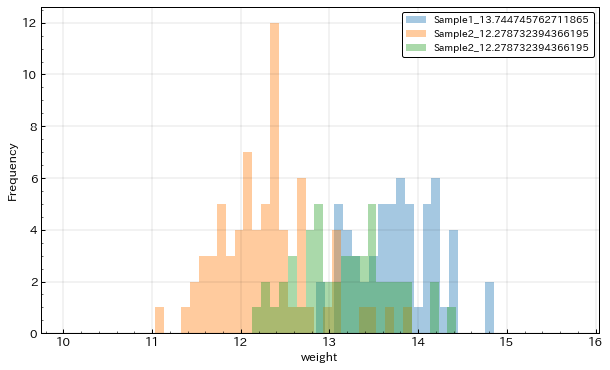

In [6]:
# ヒストグラム
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(values1, bins=np.arange(np.min(values1)-1, np.max(values1)+1, 0.1), kde=False, ax=ax, label=f"Sample1_{np.mean(values1)}")
sns.distplot(values2, bins=np.arange(np.min(values2)-1, np.max(values2)+1, 0.1), kde=False, ax=ax, label=f"Sample2_{np.mean(values2)}")
sns.distplot(values3, bins=np.arange(np.min(values2)-1, np.max(values2)+1, 0.1), kde=False, ax=ax, label=f"Sample2_{np.mean(values2)}")
ax.set_xlabel("weight")
ax.set_ylabel('Frequency')
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


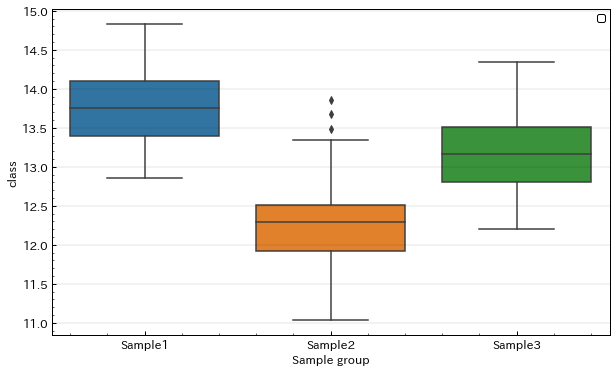

In [8]:
# box plot
fig, ax = plt.subplots(figsize=(10,6))

data = pd.concat([
       pd.DataFrame({"Sample":["Sample1" for i in range(len(values1))],
                     "Values":values1}),
       pd.DataFrame({"Sample":["Sample2" for i in range(len(values2))],
                     "Values":values2}),
       pd.DataFrame({"Sample":["Sample3" for i in range(len(values3))],
                     "Values":values3})
       ]).reset_index(drop=True)

sns.boxplot(data=data, x="Sample", y="Values")
ax.set_xlabel("Sample group")
ax.set_ylabel("class")
ax.legend()

### (0) 想定する分析シーン

- Wineの種類別3つののアルコール度数を調べる。<br>
- それぞれのアルコール度数の平均値に差があるといえるか？を統計的に検定する。<br>

### (1) 問題設定
- 帰無仮説$H_0$と対立仮説$H_1$を定義する。<br>

帰無仮説$H_0$：3種のアルコール度数の平均値は変わらない。<br>
対立仮説$H_1$：3種のうち1つ以上の平均値が異なる。<br>

### (2) 適切な検定方法を選択する。
- 検定の目的、データの確認結果、サンプル数から適切な検定方法を選択する。<br>

1. 検定の目的<br>
-> 3つの異なる母集団から、それぞれ無作為抽出された3つの標本グループについて、その標本平均が等しいかどうか？を検定する。

2. データの確認 (ただし本分析においては仮定を置いたものとする。)<br>
    2-1. 正規性の仮定<br>
        -> 母集団は正規分布に従っている。<br>
    2-2. 独立性の仮定<br>
        -> 母集団内の個体同士は互いに独立している。<br>
    2-3. 等分散性の仮定<br>
        ->バートレット検定により、等分散性を検定する。<br>

3. サンプル数の確認<br>
    サンプル数：$n_1$=59, $n_2$=71, $n_3$=48<br>
        ->標本群30サンプル以上であり十分なサンプル数がある。分布の平均値やばらつきが妥当性もって評価できると考えた。

*2-3の等分散性の仮定の確認<br>

バートレット検定<br>
複数の群の母分散が等しいかどうかを検定する。方法論は、<br>
(1)各群の標本分散を求める。<br>
(2)各群の分散を元に、バートレットの統計量を計算する。<br>
$K^2 = (N - k) \cdot \ln(s_p^2) - \sum_{i=1}^{k} [(n_i - 1) \cdot \ln(s_i^2)]$<br>
(3)統計量とカイ二乗分布(自由度は群数-1)を用いて、p値を求める。<br>
(4)p値が事前に設定した優位水準より小さい場合、母分散が等しいという帰無仮説を棄却し、等分散性が満たされていないと判断する。<br>

ここでは、上記計算をscipy.stats.bartlett()関数を用いて検定する。


In [10]:
stat, p_value = stats.bartlett(values1, values2, values3)

print("Bartlett's test statistic:", stat)
print("p-value:", p_value)

Bartlett's test statistic: 1.5988399379720122
p-value: 0.449589664451726


バートレット検定の結果、p値は5%より大きく等分散という帰無仮説を棄却できない。よって

### 検定方法：対応の無い一元配置分散分析を利用する。

### (3) 優位水準を定義する。
- 優位と判断する水準を定義する。<br>

優位水準α=5%(両側)する。<br>

### (4) 検定統計量を計算する。
- 選択した検定方法に基づいて、検定統計量を計算する。<br>

方法1) 書く統計量を求めつつ計算する。<br>

F値の計算<br>

因子間の分散(MSA) = $\sum_{i=1}^{k} n_i(\bar{Y_i} - \bar{Y})^2/(k-1)$

誤差の分散(MSE) = $\sum_{i=1}^{k} \sum_{j=1}^{n_i} (Y_{ij} - \bar{Y_i})^2/(n-k)$

F値 = 因子間の平均二乗(MSA) / 誤差の平均二乗(MSE)

p値：F分布の確率密度関数に基づいて算出される。

各変数<br>

k：グループ数<br>
n：観測値の総サンプル数<br>
$n_i$：i番目のグループの観測値のサンプル数<br>
$\bar{Y_i}$：i番目のグループの平均値<br>
$\bar{Y}$：全体の平均値<br>
Y：観測値<br>
MSA：因子間の平均二乗。因子による群間平方和を自由度で割った値<br>
MSE：誤差の平均二乗。残差による群内平方和を自由度で割った<br>

In [11]:
# Function
def calc_Fvalue(values1:list, values2:list, values3:list)->float:
    '''
    tを計算する

    Args
        values1 (list) : 標本1の計算対象の1次元リスト。numpy.arrayやpandas.Seriesも可
        values2 (list) : 標本1の計算対象の1次元リスト。numpy.arrayやpandas.Seriesも可
        values3 (list) : 標本1の計算対象の1次元リスト。numpy.arrayやpandas.Seriesも可

    Return
        F : 計算されたF値を返す。
    '''

    # calc mean
    # each mean value
    m_1, m_2, m_3 = np.mean(values1), np.mean(values2), np.mean(values3)
    # total mean value
    m_t = np.mean(np.concatenate([values1, values2, values3]))
    # count value
    n_1, n_2, n_3 = len(values1), len(values2), len(values3)

    # 群間平方和の計算
    SSA = n_1*(m_1-m_t)**2 + n_2*(m_2-m_t)**2 + n_3*(m_3-m_t)**2

    # 群内平方和の計算
    SSE = np.sum(np.sum((values1-m_1)**2) + np.sum((values2-m_2)**2) + np.sum((values3-m_3)**2))

    # 自由度
    dfA = 2
    dfE = n_1 + n_2 + n_3 - 3

    # F値
    MSA = SSA / dfA
    MSE = SSE / dfE
    F = MSA / MSE

    # print each value
    print(f"SSA, SSE : {SSA}, {SSE}")
    print(f"dfA, dfE : {SSA}, {SSE}")
    print(f"MSA, MSE : {MSA}, {MSE}")
    print(f"F value : {F}")


    return dfA, dfE, F

In [13]:
# calculate t value
dfA, dfE, F = calc_Fvalue(values1=values1, values2=values2, values3=values3)

# 両側信頼係数のF値を求める。
# 自由度
d = len(values1) - 1
# 片側優位水準
alpha = 0.05

# scipy.statsを使って計算する。
f_thre = stats.f.ppf(q=1 - alpha/2, dfn=dfA, dfd=dfE)
print(f"F value threshold : {f_thre}")

SSA, SSE : 70.79484992053865, 45.85918210193364
dfA, dfE : 70.79484992053865, 45.85918210193364
MSA, MSE : 35.397424960269326, 0.2620524691539065
F value : 135.07762424280003
F value threshold : 3.76774284482974


2) scipy.stats.f_oneway()関数を使って計算する。

In [14]:
f_value, p_value = stats.f_oneway(values1, values2, values3)

print(f"F value : {f_value}")

F value : 135.07762424279912


### (5) p値を計算する。
- 検定統計量に基づいてp値を計算する。<br>

In [15]:
print(f"p value : {p_value}")

p value : 3.319503795619638e-36


### (6) 結果を解釈する。
- p値と優位水準を比較して結果を解釈する。<br>
p値≦$α$：帰無仮説を棄却し、対立仮説を採択する。<br>
p値>$α$：帰無仮説を棄却できない

### 判定
- p値はほぼゼロであり優位水準5%より小さい。よって帰無仮説は棄却されない。<br>
-> 差はある

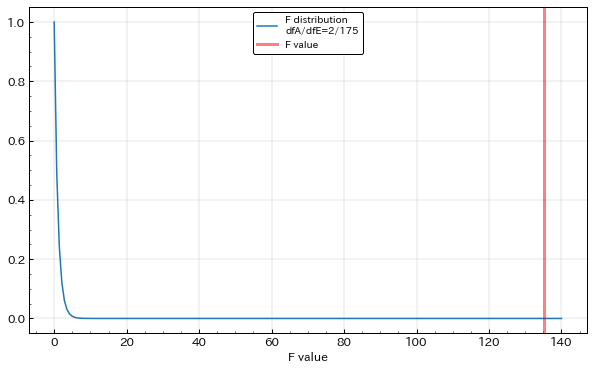

In [16]:
# F分布サンプリング
f_range = np.linspace(0,140,200)
f_value_ar = []
for i in f_range:
    f_value_ar.append(stats.f.pdf(x=i, dfn=dfA, dfd=dfE))

# plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(f_range, f_value_ar, label="F distribution\ndfA/dfE={}/{}".format(dfA, dfE))
ax.axvline(x=f_value, ymin=0, ymax=1, color="red", lw=3, linestyle="-", alpha=0.5, label="F value")
ax.set_xlabel("F value")
ax.legend()

### (7) 効果量を計算する。
- 検定の結果が優位であれば、効果量を計算し意義を評価する。<br>

方法) $\eta^2$で計算する。

$\eta^2$ : 効果(群間の差)が全体の変動(群内+群間の差)に占める割合。

$\eta^2 = \frac{SS_{between}}{SS_{total}}$

各変数は<br>
$SS_{between}$: 群間の平方和<br>
$SS_{total}$: 全体の平方和<br>

$\eta^2の値が大きいほど、効果量が大きいと判断する。<br>
効果量の大きさの目安は、

0.01: 小さい効果<br>
0.06: 中くらいの効果<br>
0.14: 大きい効果<br>

In [17]:
# eta^2の計算関数
def eta_sq(values1, values2, values3):
    # calc mean
    # each mean value
    m_1, m_2, m_3 = np.mean(values1), np.mean(values2), np.mean(values3)
    # total mean value
    m_t = np.mean(np.concatenate([values1, values2, values3]))
    # count value
    n_1, n_2, n_3 = len(values1), len(values2), len(values3)

    # 群間平方和の計算
    SSA = n_1*(m_1-m_t)**2 + n_2*(m_2-m_t)**2 + n_3*(m_3-m_t)**2

    # 全体平方和の計算
    # 全体の平方和 (SS_total) を計算します
    all_data = np.concatenate([values1, values2, values3])
    SST = sum([(x - np.mean(all_data))**2 for x in all_data])

    # η^2 を計算します
    eta_squared = SSA / SST

    return eta_squared

In [18]:
etasq = eta_sq(values1, values2, values3)

print(f"Cohen d values : {etasq}")

Cohen d values : 0.6068787224337082


### 判定
$\eta^2$は0.607と大きい。<br>
-> よって大きい効果。